In [20]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn import preprocessing


In [3]:
# reading data file

data=pd.read_csv('train.csv')

data.head()

,ID (this is not a feature),age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,1,36,Private,355053,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,28,United-States,<=50K
1,2,30,Self-emp-inc,132601,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,3,19,Private,63814,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,18,United-States,<=50K
3,4,44,Private,112507,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,5,51,Self-emp-inc,126850,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,65,United-States,<=50K


In [5]:
# checking for null values

data.isna().sum()

ID (this is not a feature)    0
age                           0
workclass                     0
fnlwgt                        0
education                     0
education-num                 0
marital-status                0
occupation                    0
relationship                  0
race                          0
sex                           0
capital-gain                  0
capital-loss                  0
hours-per-week                0
native-country                0
salary                        0
dtype: int64

In [9]:
# checking outliers using box plot

# for i in data.columns:
#     sns.boxplot(data[i])
#     plt.show()

In [10]:
# checking outlier for a feature "trestbps"

# sns.boxplot(heart_df["trestbps"])

In [11]:
# histogram plot for a feature -- "trestbps"

# sns.distplot(heart_df["trestbps"])

In [13]:
# removing outliers above 85th percentile

# for i in data.columns:
#     max = data[i].quantile(0.85)
#     data.loc[data[i] > max,i] = max

In [14]:
# checking the outliers

# for i in heart_df.columns:
#     sns.boxplot(heart_df[i])
#     plt.show()

In [15]:
# checking the distance of data points

data.describe()

,ID (this is not a feature),age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,38842.000000,38842.000000,3.884200e+04,38842.000000,38842.000000,38842.000000,38842.000000
mean,18984.475000,37.449230,1.896647e+05,10.079090,1104.456696,88.272334,40.416559
std,10580.984627,11.533738,1.059645e+05,2.569149,7606.736264,404.032486,12.385112
min,1.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,9711.250000,28.000000,1.173630e+05,9.000000,0.000000,0.000000,40.000000
50%,19421.500000,37.000000,1.782185e+05,10.000000,0.000000,0.000000,40.000000
75%,29131.750000,48.000000,2.376275e+05,12.000000,0.000000,0.000000,45.000000
max,33015.850000,54.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
# Encoding categorical labels into numeric
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['workclass']=le.fit_transform(data['workclass'])
data['education']=le.fit_transform(data['education'])
data['marital-status']=le.fit_transform(data['marital-status'])
data['occupation']=le.fit_transform(data['occupation'])
data['relationship']=le.fit_transform(data['relationship'])
data['race']=le.fit_transform(data['race'])
data['sex']=le.fit_transform(data['sex'])
data['native-country']=le.fit_transform(data['native-country'])

# exclude output feature for scaling

X = data.drop('salary',axis = 1)
Y = data['salary']

In [22]:
# Scaling the numeric columns

scalar = StandardScaler()
X = scalar.fit_transform(X)

In [12]:
# splitting the data

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# fitting the logistic regression model

lreg = LogisticRegression(random_state=42).fit(X, Y)

In [30]:

# Load data
data_test=pd.read_csv('test.csv')

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data_test['salary']=le.fit_transform(data_test['salary'])
data_test['workclass']=le.fit_transform(data_test['workclass'])
data_test['education']=le.fit_transform(data_test['education'])
data_test['marital-status']=le.fit_transform(data_test['marital-status'])
data_test['occupation']=le.fit_transform(data_test['occupation'])
data_test['relationship']=le.fit_transform(data_test['relationship'])
data_test['race']=le.fit_transform(data_test['race'])
data_test['sex']=le.fit_transform(data_test['sex'])
data_test['native-country']=le.fit_transform(data_test['native-country'])

X_test = data_test.drop('salary', axis=1)
y_test = data_test['salary']

X_test = preprocessing.MinMaxScaler().fit_transform(X_test)

# predicting the test result using model

y_pred = lreg.predict(X_test)

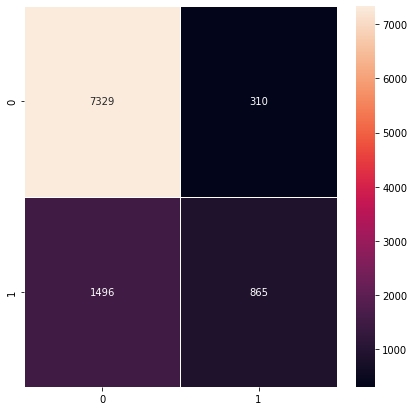

In [31]:
# Visualising the confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7, xticklabels=pd.unique(['0', '1']),yticklabels=pd.unique(['0', '1']))
plt.show()

In [32]:
# Calculating the accuracy for logistic reg.

acc_class_lreg = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", round(acc_class_lreg*100,2),"%")

Accuracy:  81.94 %


In [33]:
# Fitting the perceptron model

clf = Perceptron(max_iter = 1000,  n_jobs = -1, random_state=42)
clf.fit(X, Y)
clf_pred = clf.predict(X_test)

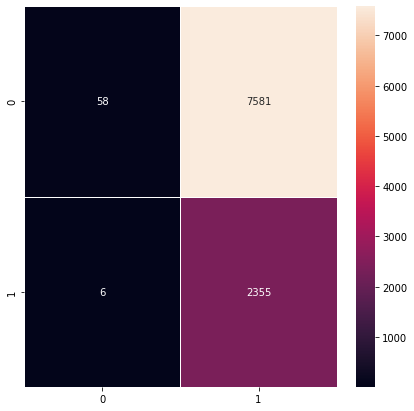

In [34]:
# Visualizing the confusion matrix for perceptron

cm1 = metrics.confusion_matrix(y_test, clf_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm1, annot=True, fmt="d", linewidths=0.7, xticklabels=pd.unique(['0', '1']),yticklabels=pd.unique(['0', '1']))
plt.show()

In [35]:
# Calculating the accuracy for perceptron

acc_class_percep = metrics.accuracy_score(y_test, clf_pred)
print("Accuracy: ", round(acc_class_percep*100,2),"%")

Accuracy:  24.13 %
